<h2 align=center>Beach sensor IOT (Part 1): Exploratory Data Analysis</h2>
<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Vq6a2oYmIYdxNawZ_7qooQ.jpeg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/Beach.csv', encoding='latin-1')



In [4]:
data

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Foster Weather Station,11/29/2023 07:00:00 PM,2.50,NaN,62,NaN,0.0,NaN,NaN,0.0,3.3,0.0,989.8,6.0,NaN,14.9,11/29/2023 7:00 PM,FosterWeatherStation202311291900
1,Oak Street Weather Station,11/29/2023 07:00:00 PM,4.20,1.7,65,0.0,0.0,31.7,0.0,281.0,2.4,6.4,991.9,2.0,358.0,11.9,11/29/2023 7:00 PM,OakStreetWeatherStation202311291900
2,Foster Weather Station,11/29/2023 06:00:00 PM,2.56,NaN,62,NaN,0.0,NaN,NaN,0.0,3.3,0.0,990.2,6.0,NaN,14.9,11/29/2023 6:00 PM,FosterWeatherStation202311291800
3,Oak Street Weather Station,11/29/2023 06:00:00 PM,3.90,1.4,63,0.0,0.0,31.7,0.0,291.0,1.4,3.6,992.0,2.0,358.0,11.8,11/29/2023 6:00 PM,OakStreetWeatherStation202311291800
4,Foster Weather Station,11/29/2023 05:00:00 PM,3.50,NaN,58,NaN,0.0,NaN,NaN,0.0,3.3,0.0,989.8,4.0,NaN,15.1,11/29/2023 5:00 PM,FosterWeatherStation202311291700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33933,Foster Weather Station,02/26/2022 04:00:00 AM,-8.39,NaN,66,NaN,0.0,NaN,NaN,0.0,3.3,0.0,1009.5,2.0,NaN,14.8,02/26/2022 4:00 AM,FosterWeatherStation202202260400
33934,Oak Street Weather Station,02/26/2022 04:00:00 AM,-6.90,-8.1,69,0.0,0.0,29.8,0.0,276.0,0.6,2.4,1011.1,4.0,357.0,12.0,02/26/2022 4:00 AM,OakStreetWeatherStation202202260400
33935,63rd Street Weather Station,02/26/2022 03:00:00 AM,-6.90,-7.9,75,0.0,0.0,18.7,0.0,283.0,3.1,4.2,1010.5,5.0,350.0,11.8,02/26/2022 3:00 AM,63rdStreetWeatherStation202202260300
33936,Foster Weather Station,02/26/2022 03:00:00 AM,-7.89,NaN,66,NaN,0.0,NaN,NaN,0.0,3.3,0.0,1009.8,1.0,NaN,15.2,02/26/2022 3:00 AM,FosterWeatherStation202202260300


<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features

In [5]:
data.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Foster Weather Station,11/29/2023 07:00:00 PM,2.50,NaN,62,NaN,0.0,NaN,NaN,0.0,3.3,0.0,989.8,6.0,NaN,14.9,11/29/2023 7:00 PM,FosterWeatherStation202311291900
1,Oak Street Weather Station,11/29/2023 07:00:00 PM,4.20,1.7,65,0.0,0.0,31.7,0.0,281.0,2.4,6.4,991.9,2.0,358.0,11.9,11/29/2023 7:00 PM,OakStreetWeatherStation202311291900
2,Foster Weather Station,11/29/2023 06:00:00 PM,2.56,NaN,62,NaN,0.0,NaN,NaN,0.0,3.3,0.0,990.2,6.0,NaN,14.9,11/29/2023 6:00 PM,FosterWeatherStation202311291800
3,Oak Street Weather Station,11/29/2023 06:00:00 PM,3.90,1.4,63,0.0,0.0,31.7,0.0,291.0,1.4,3.6,992.0,2.0,358.0,11.8,11/29/2023 6:00 PM,OakStreetWeatherStation202311291800
4,Foster Weather Station,11/29/2023 05:00:00 PM,3.50,NaN,58,NaN,0.0,NaN,NaN,0.0,3.3,0.0,989.8,4.0,NaN,15.1,11/29/2023 5:00 PM,FosterWeatherStation202311291700


In [6]:
data.columns

Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')

In [7]:
len(data.columns)

18

In [8]:
Foster, Oak, RdStreet = data['Station Name'].value_counts()
print(Foster, Oak, RdStreet)


15014 14905 4019


In [9]:
data.columns

Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')

In [10]:
data.shape

(33938, 18)

<Axes: >

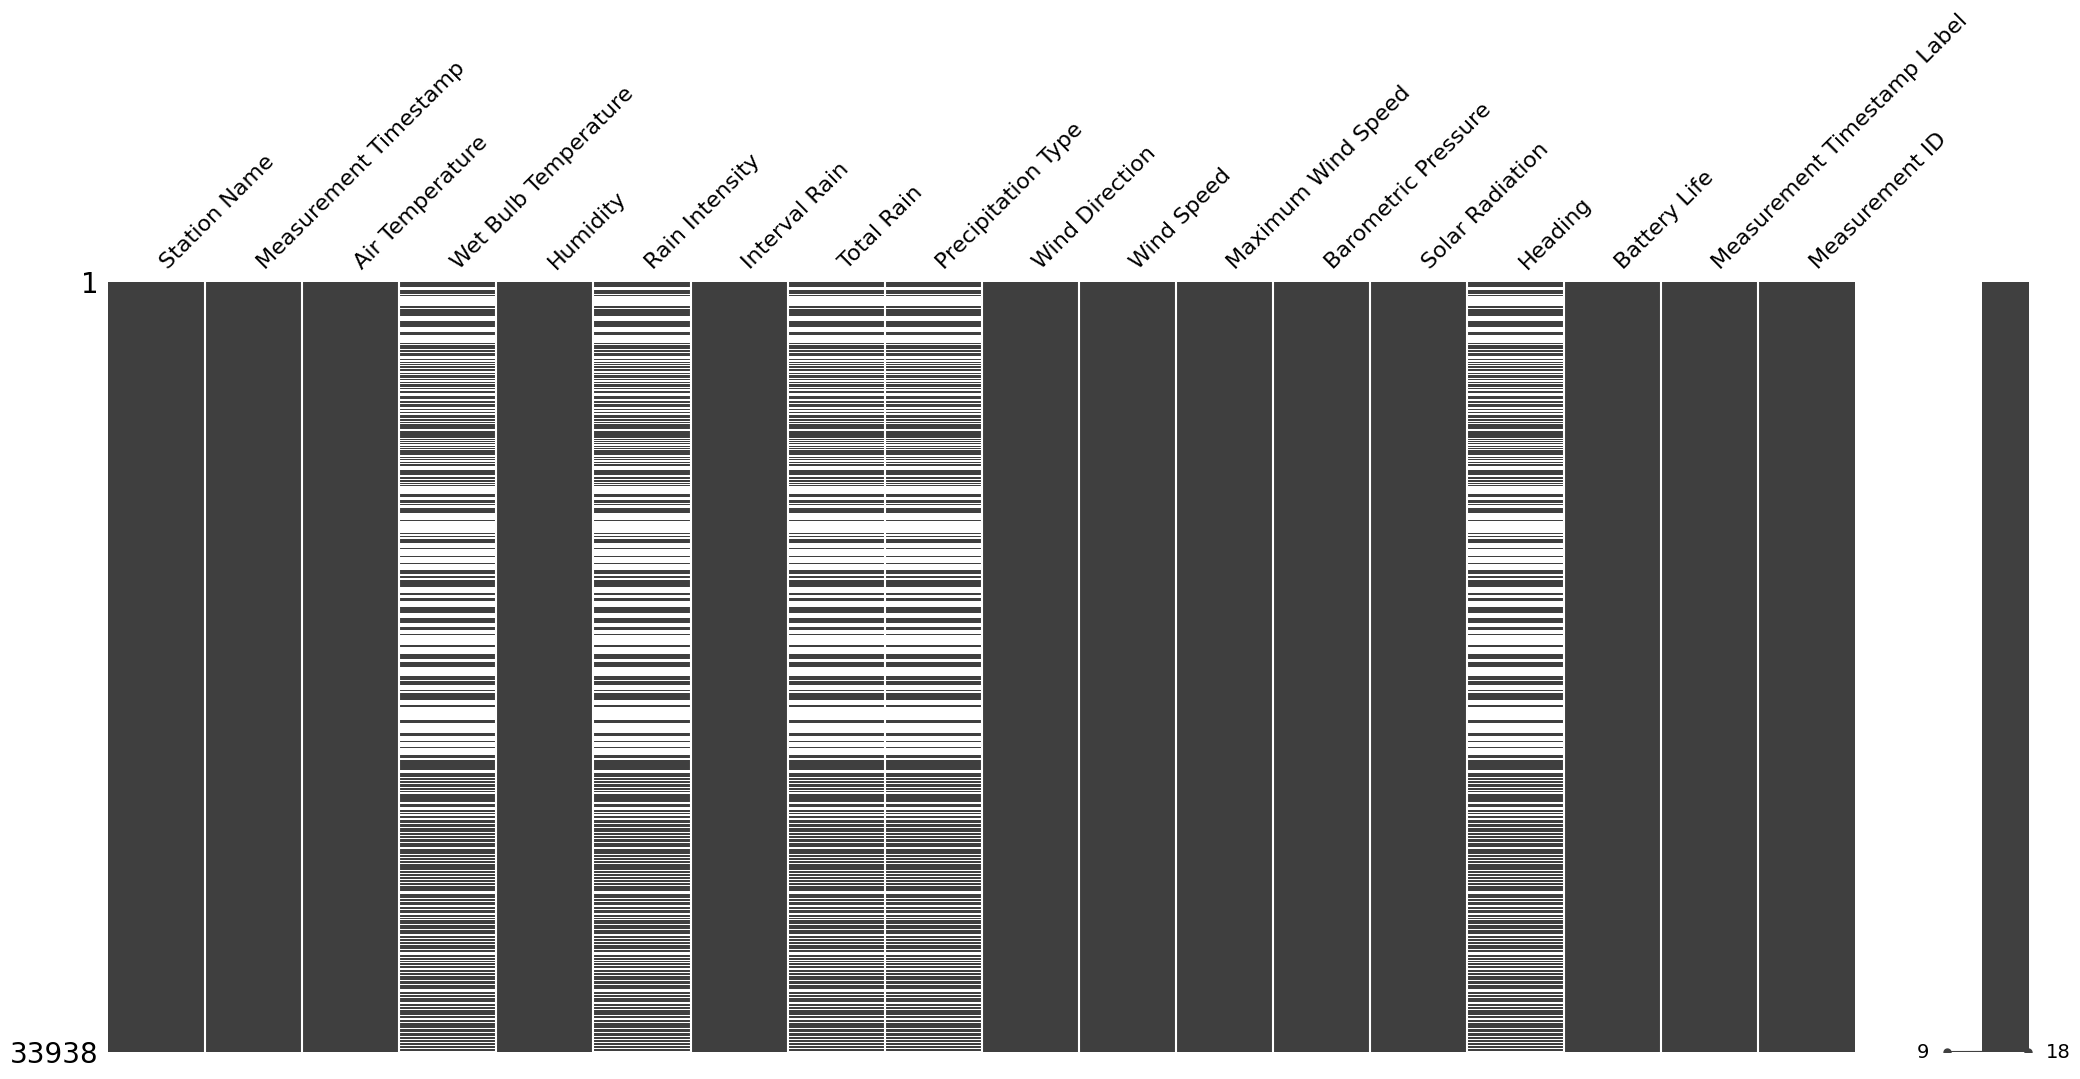

In [11]:
!pip install missingno
import missingno as msno
msno.matrix(data)

In [12]:
# feature names as a list
data.columns       # .columns gives columns names in data


Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')

In [13]:
# y includes our labels and x includes our features
y = data                       # M or B
list =[ 'Station Name','Measurement Timestamp','Measurement Timestamp Label','Measurement ID',
        'Wet Bulb Temperature','Rain Intensity','Total Rain','Precipitation Type','Heading', 'Wind Speed','Battery Life','Interval Rain', 'Barometric Pressure']
x = data.drop(list,axis = 1 )
x.head()

,Air Temperature,Humidity,Wind Direction,Maximum Wind Speed,Solar Radiation
0,2.50,62,0.0,0.0,6.0
1,4.20,65,281.0,6.4,2.0
2,2.56,62,0.0,0.0,6.0
3,3.90,63,291.0,3.6,2.0
4,3.50,58,0.0,0.0,4.0


### Task 3: Plot Diagnosis Distributions

Number of enregistrement capteur par station Oak Street Weather Station: 15014
Number of enregistrement capteur par station Foster Weather Station: 14905
Number of enregistrement capteur par station 63rd Street Weather Station: 4019


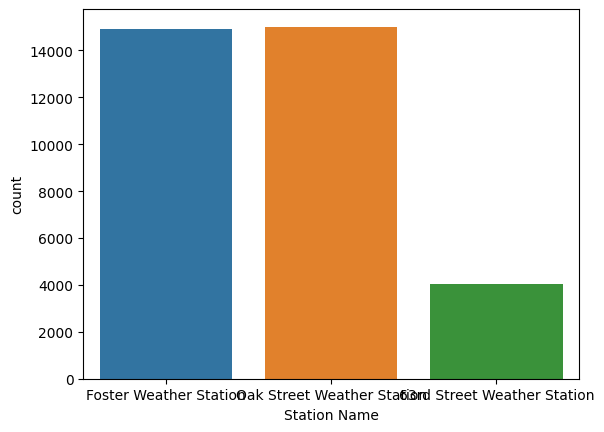

In [14]:
# Assuming 'y' is your DataFrame column
ax = sns.countplot(x=y['Station Name'], label="Count")

# Get value counts
value_counts = y['Station Name'].value_counts()

# Print the counts
for value, count in value_counts.items():
    print(f'Number of enregistrement capteur par station {value}: {count}')


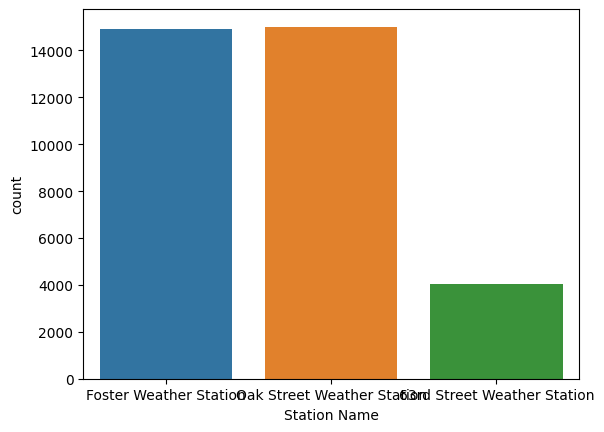

In [15]:
ax = sns.countplot(x=y['Station Name'])

In [16]:
x.head().describe()

,Air Temperature,Humidity,Wind Direction,Maximum Wind Speed,Solar Radiation
count,5.000000,5.00000,5.000000,5.000000,5.0
mean,3.332000,62.00000,114.400000,2.000000,4.0
std,0.773382,2.54951,156.688545,2.912044,2.0
min,2.500000,58.00000,0.000000,0.000000,2.0
25%,2.560000,62.00000,0.000000,0.000000,2.0
50%,3.500000,62.00000,0.000000,0.000000,4.0
75%,3.900000,63.00000,281.000000,3.600000,6.0
max,4.200000,65.00000,291.000000,6.400000,6.0


<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn

Index(['Air Temperature', 'Humidity', 'Wind Direction', 'Maximum Wind Speed',
       'Solar Radiation', 'Station Name'],
      dtype='object')


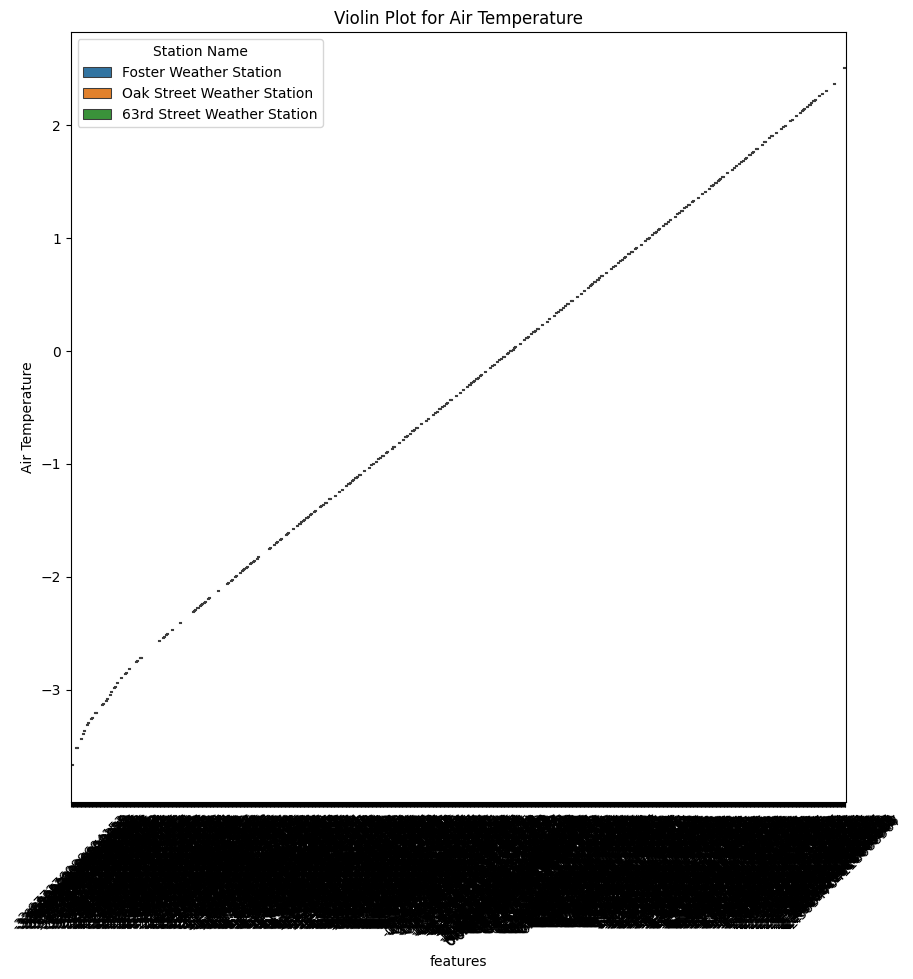

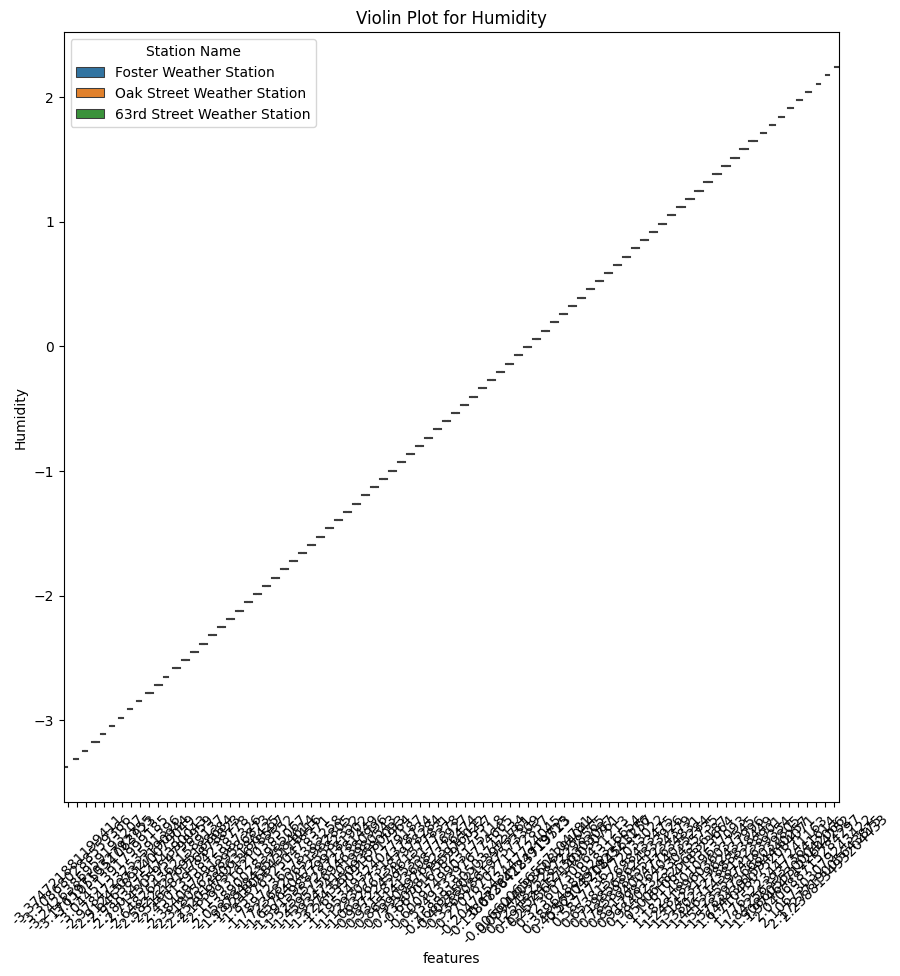

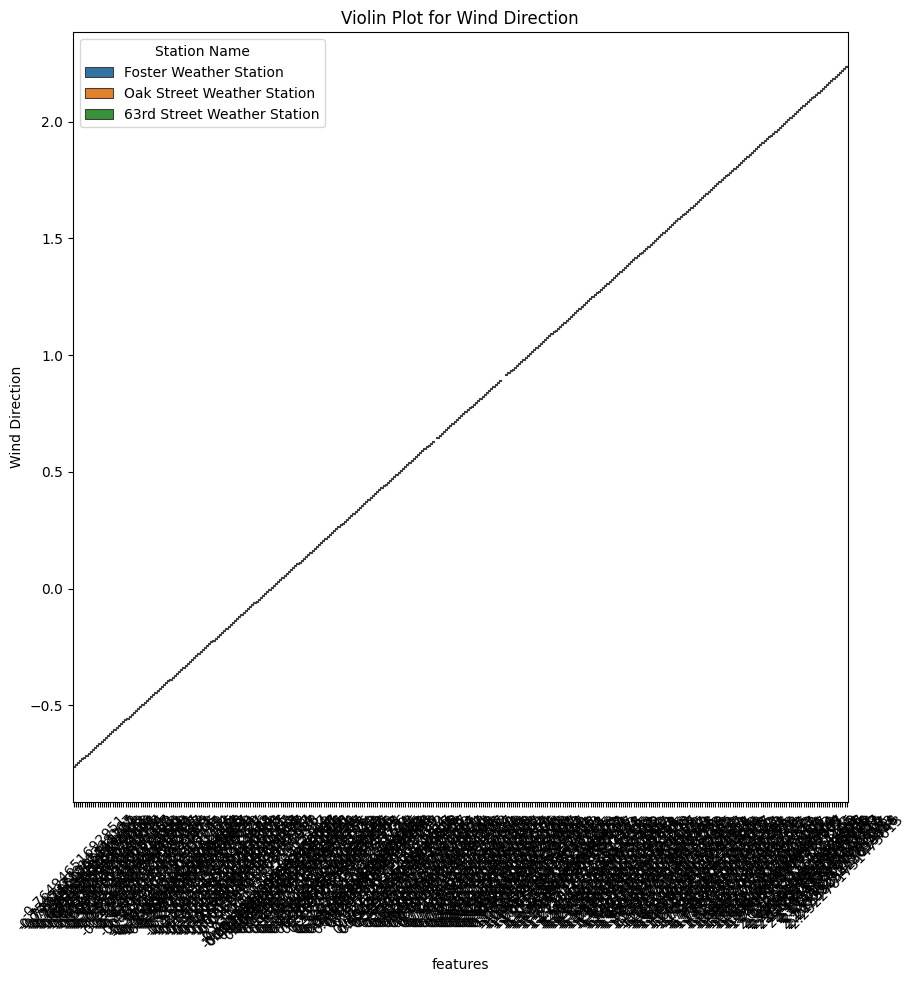

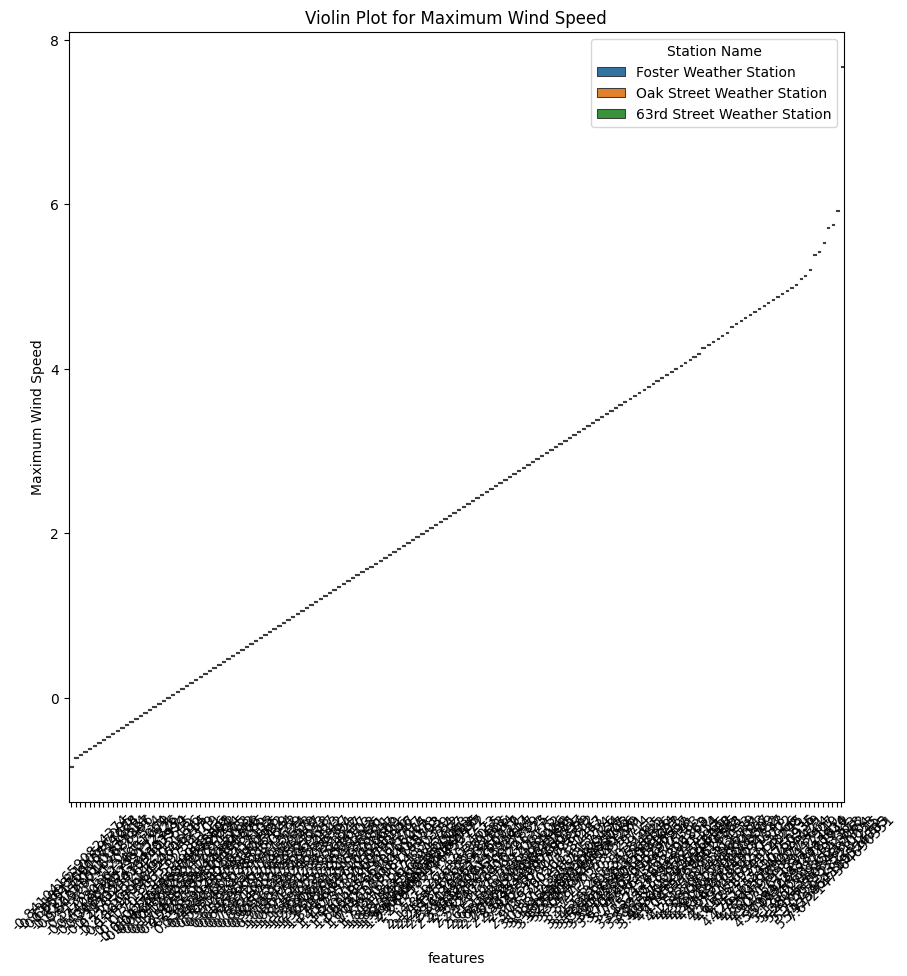

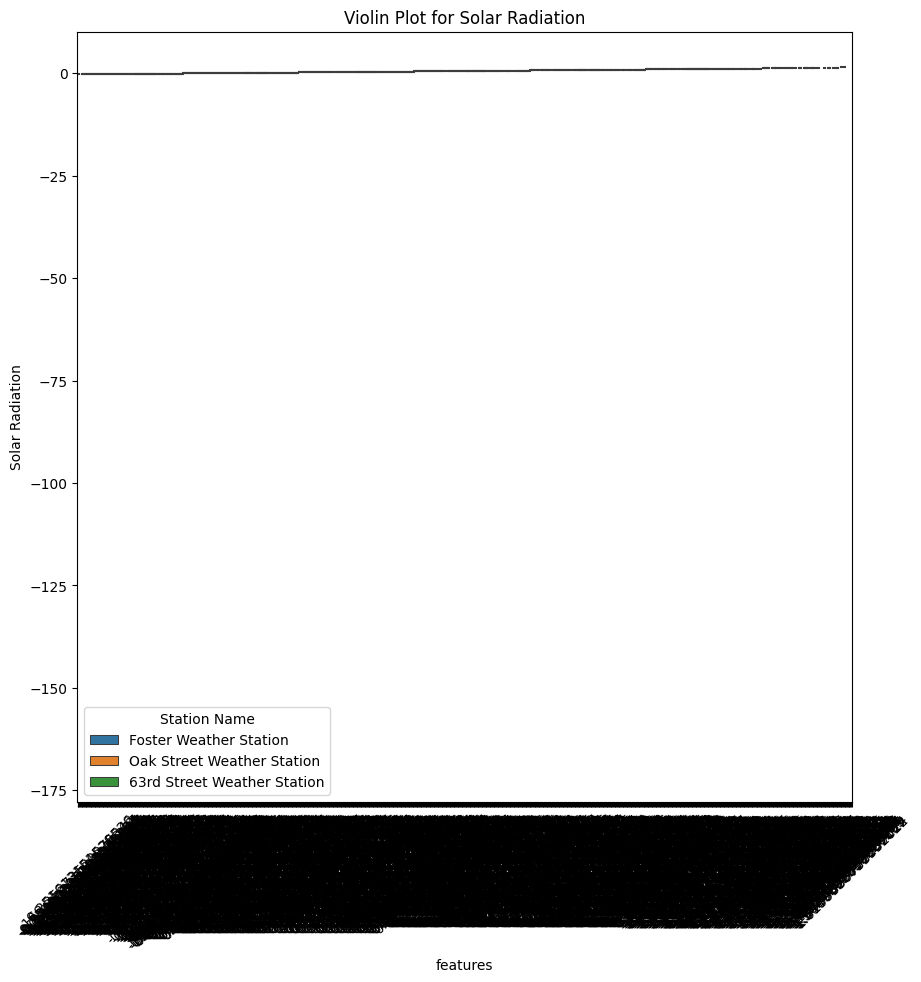

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is the feature data and 'y' is the target variable
data_dia = y
data = x

# Standardize the feature data
data_n_2 = (data - data.mean()) / data.std()

# Assuming 'Station Name' is a column in 'data_dia'
# If not, replace 'Station Name' with the actual column name you want to use
data_n_2['Station Name'] = data_dia['Station Name']

# Assuming the following are the columns you want to plot
columns_to_plot = [
    'Air Temperature',
    'Humidity',
    'Wind Direction',
    'Maximum Wind Speed',
    'Solar Radiation'
]

# Print the columns of 'data' to see available column names
print(data_n_2.columns)

# Plot each column in a separate violin plot
for column in columns_to_plot:
    # Replace 'features' with the actual column name representing the categories for the x-axis
    data_n_2['features'] = data_n_2[column]

    # Replace 'your_actual_column_name' with the column you want to plot on the y-axis
    data_n_2[column] = pd.to_numeric(data_n_2[column], errors='coerce')

    # Plot the violin plot
    plt.figure(figsize=(10, 10))
    sns.violinplot(x="features", y=column, hue='Station Name', data=data_n_2, inner="quartile")
    plt.title(f'Violin Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

### Task 5: Violin Plots and Box Plots

Index(['Air Temperature', 'Humidity', 'Wind Direction', 'Maximum Wind Speed',
       'Solar Radiation', 'Station Name'],
      dtype='object')


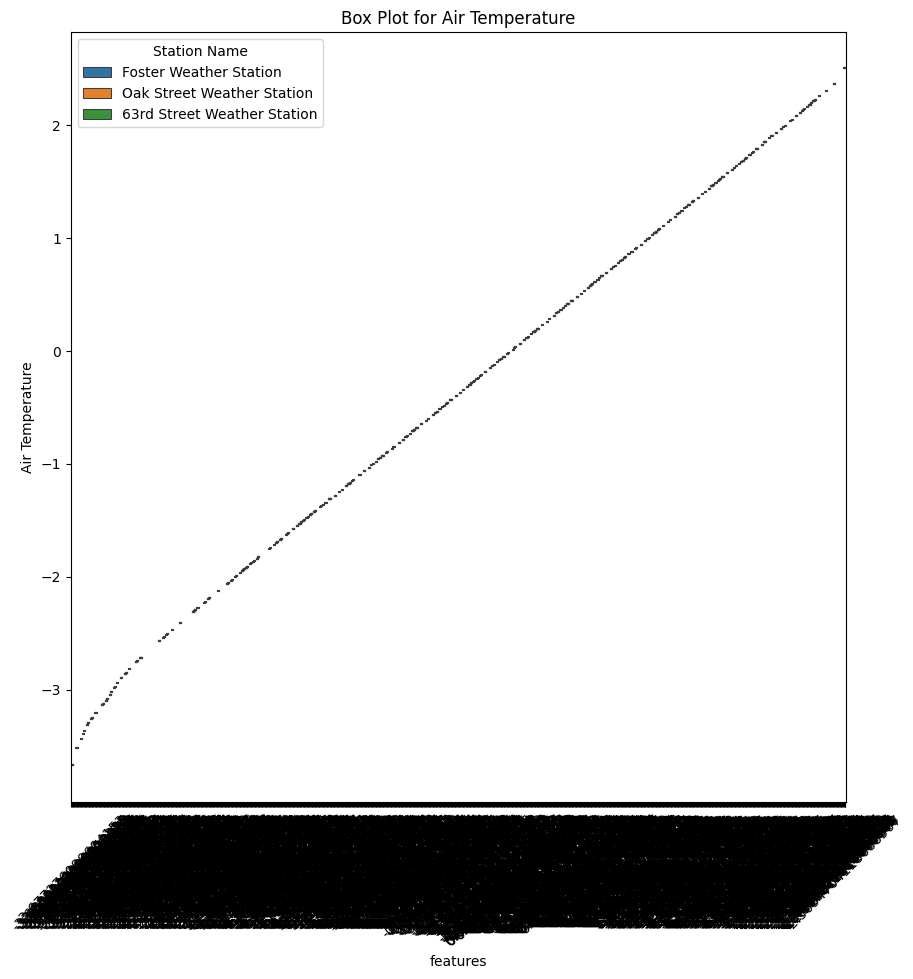

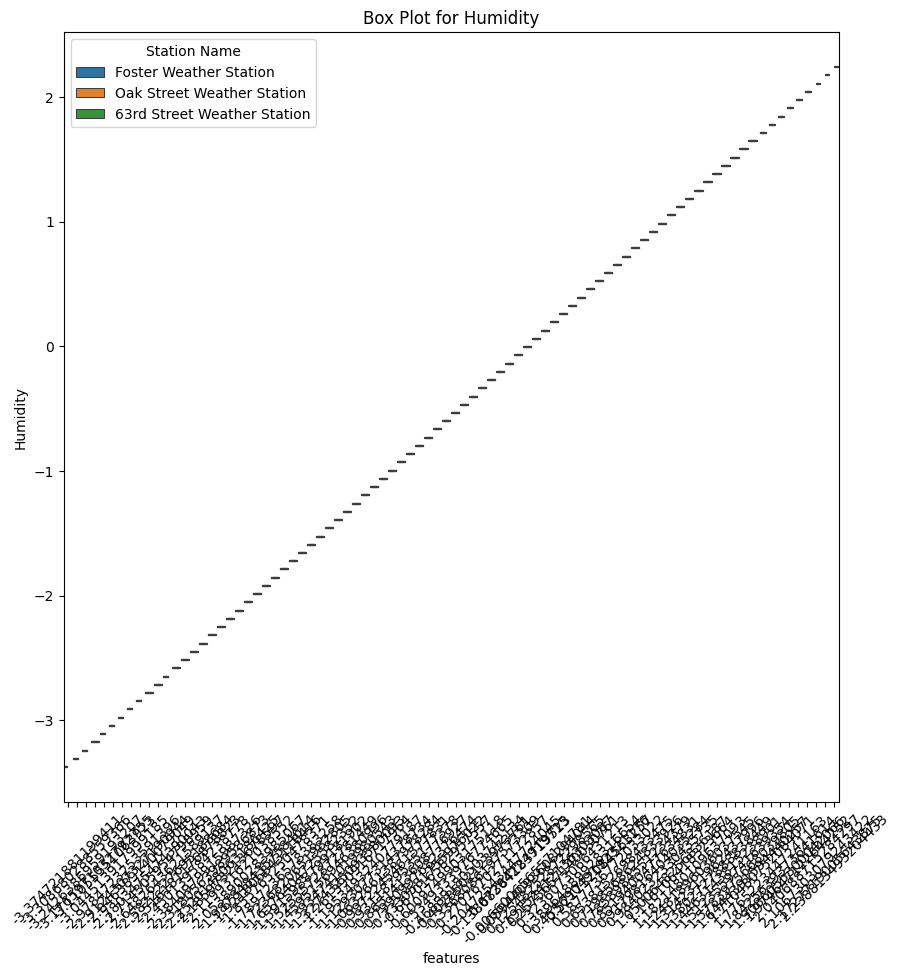

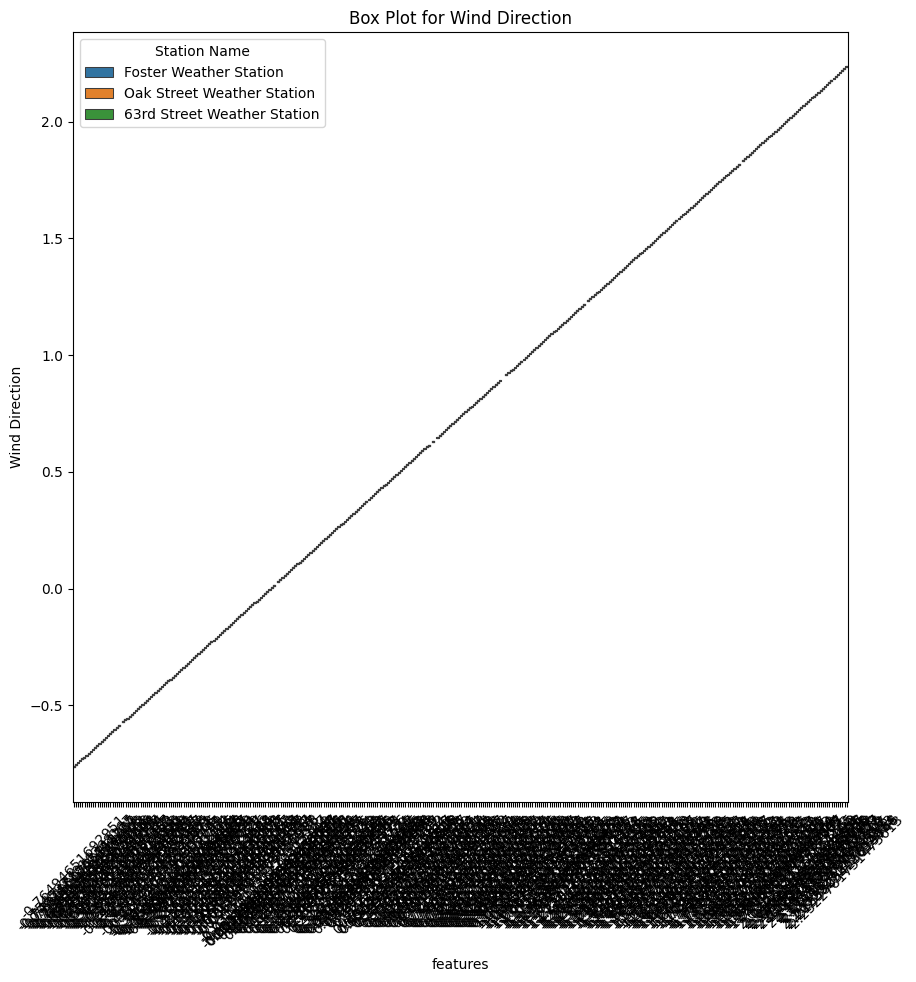

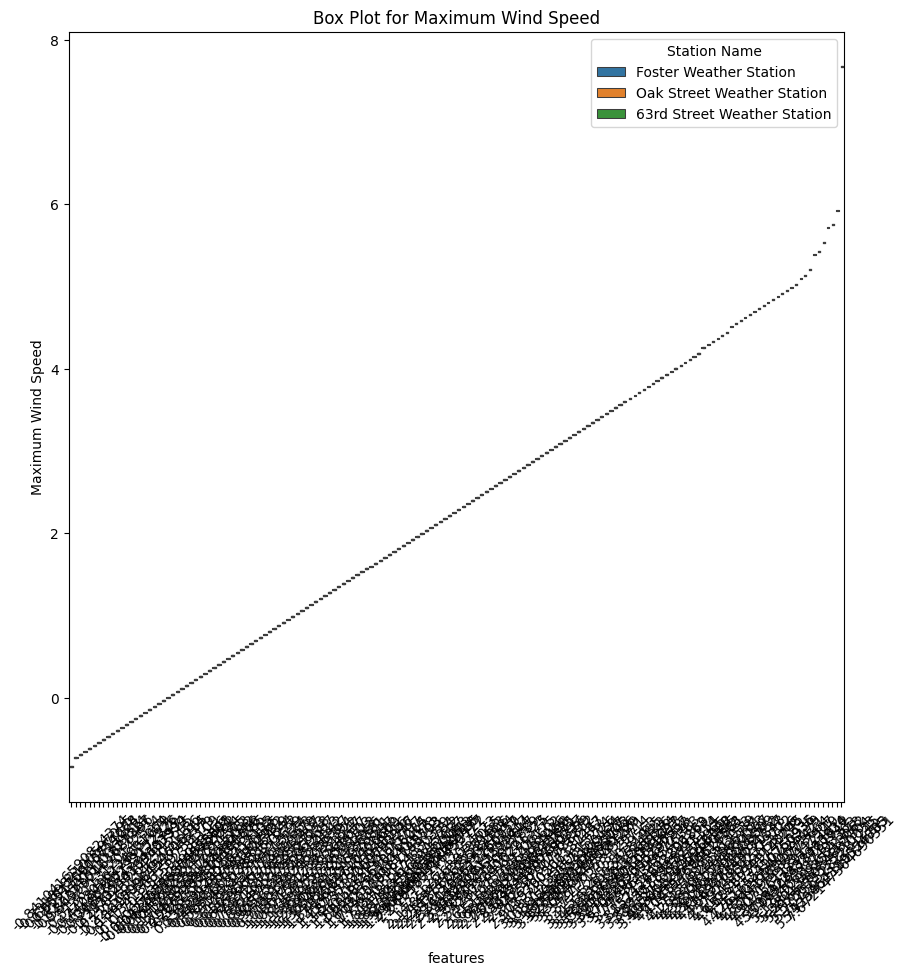

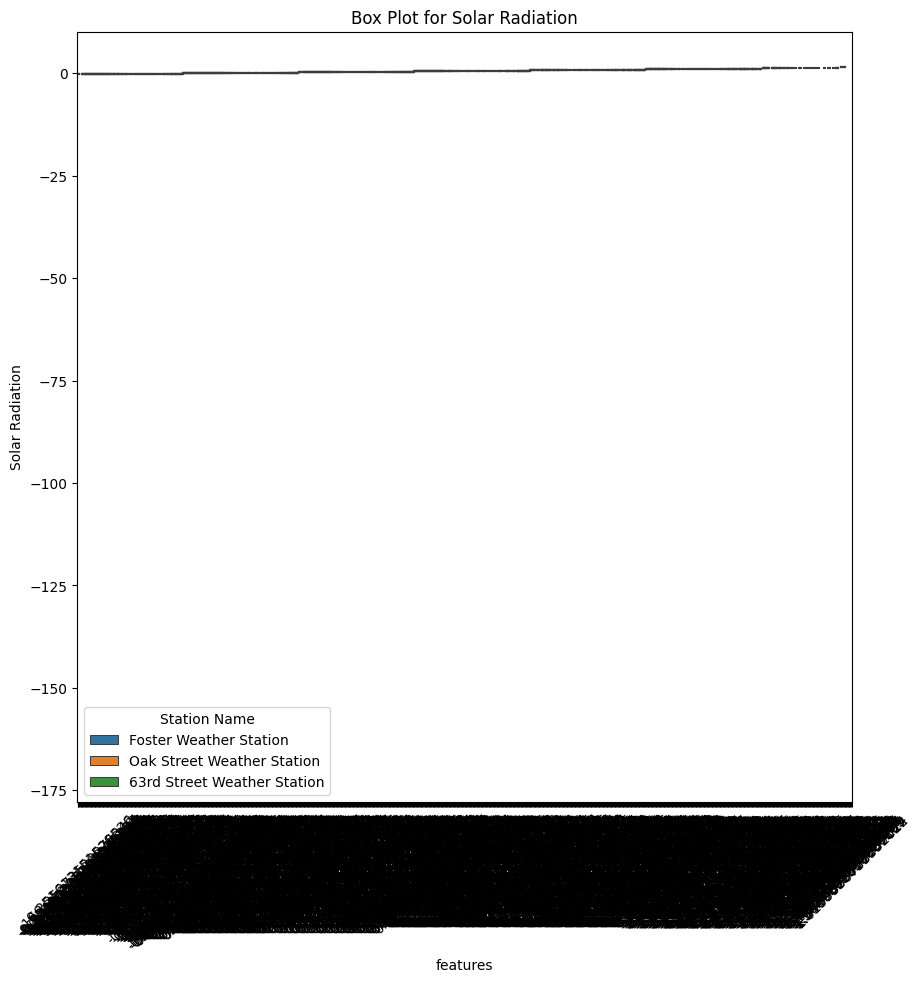

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is the feature data and 'y' is the target variable
data_dia = y
data = x

# Standardize the feature data
data_n_2 = (data - data.mean()) / data.std()

# Assuming 'Station Name' is a column in 'data_dia'
# If not, replace 'Station Name' with the actual column name you want to use
data_n_2['Station Name'] = data_dia['Station Name']

# Assuming the following are the columns you want to plot
columns_to_plot = [
    'Air Temperature',
    'Humidity',
    'Wind Direction',
    'Maximum Wind Speed',
    'Solar Radiation'
]

# Print the columns of 'data' to see available column names
print(data_n_2.columns)

# Plot each column in a separate box plot
for column in columns_to_plot:
    # Replace 'features' with the actual column name representing the categories for the x-axis
    data_n_2['features'] = data_n_2[column]

    # Replace 'your_actual_column_name' with the column you want to plot on the y-axis
    data_n_2[column] = pd.to_numeric(data_n_2[column], errors='coerce')

    # Plot the box plot
    plt.figure(figsize=(10, 10))
    sns.boxplot(x="features", y=column, hue='Station Name', data=data_n_2)
    plt.title(f'Box Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

### Task 6: Using Joint Plots for Feature Comparison

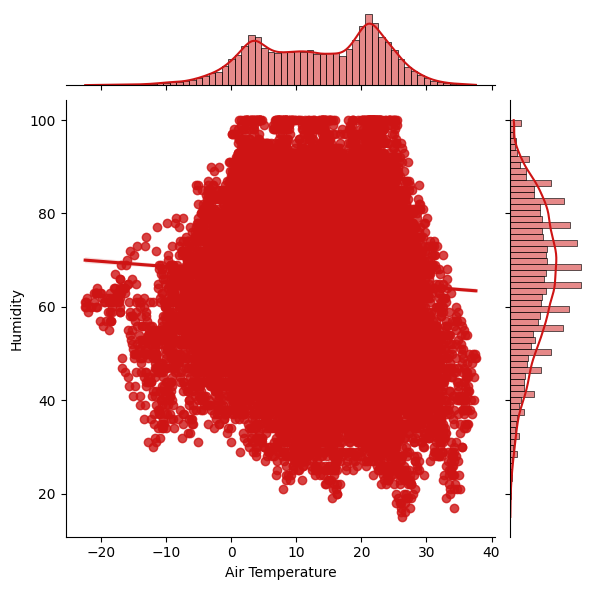

In [ ]:
sns.jointplot(x=x.loc[:,'Air Temperature'],
              y=x.loc[:,'Humidity'],
              kind="reg",
              color="#ce1414");

### Task 7: Uncovering Correlated Features with Pair Grids

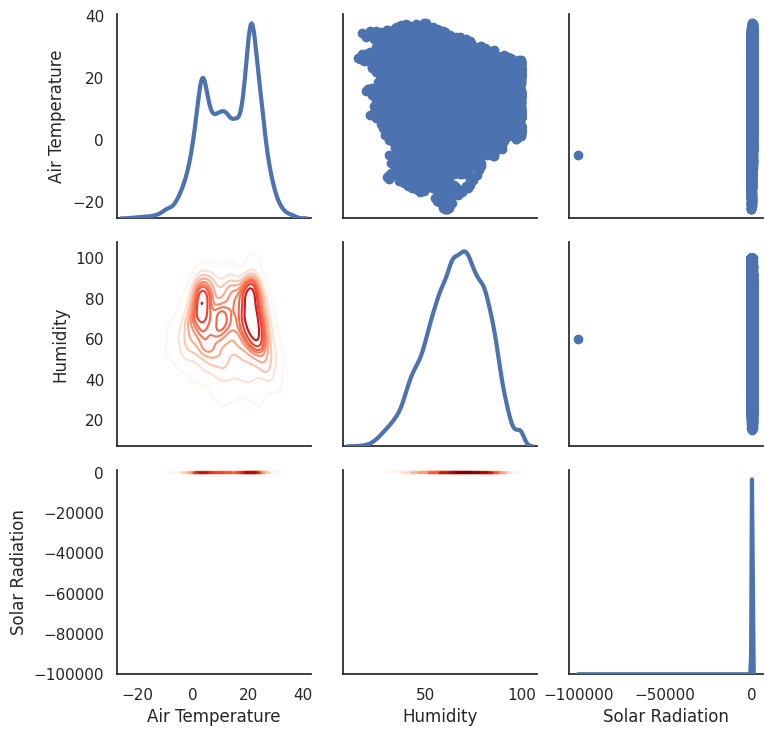

In [ ]:
sns.set(style="white")
df = x.loc[:, [
    'Air Temperature',
    'Humidity','Solar Radiation'

]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Reds")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### Task 8: Observing the Distribution of Values and their Variance with Swarm Plots

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 54.8% of the points cannot be plac

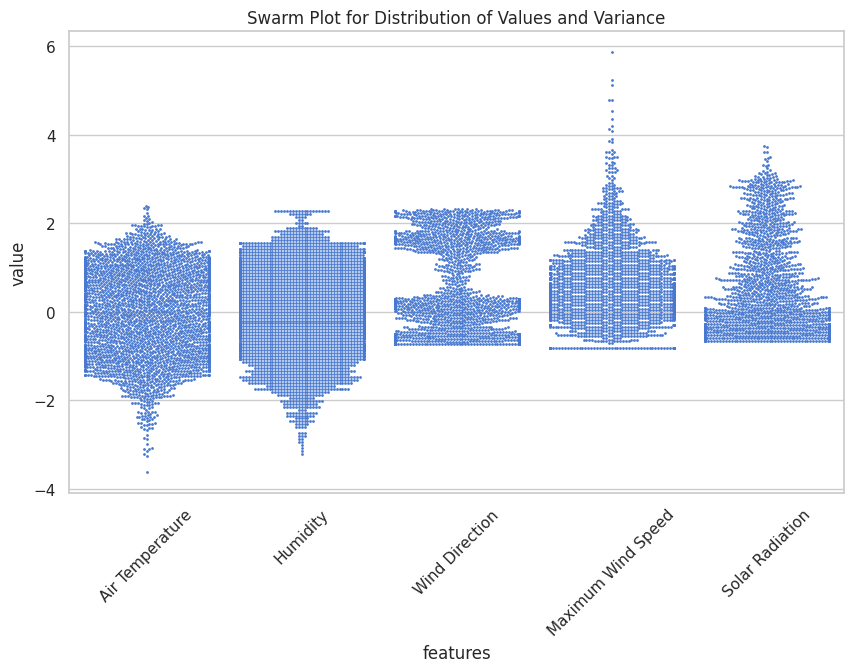

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is the feature data and 'y' is the target variable
data_dia = y
data = x

# Sample a smaller subset of data points (adjust the fraction as needed)
data_sampled = data.sample(frac=0.1, random_state=42)

# Standardize the feature data
data_n_2 = (data_sampled - data_sampled.mean()) / data_sampled.std()

# Assuming 'Station Name' is a column in 'data_dia'
# If not, replace 'Station Name' with the actual column name you want to use
data_n_2['Station Name'] = data_dia['Station Name']

# Melt the data for visualization
data_melted = pd.melt(data_n_2, id_vars="Station Name", var_name="features", value_name='value')

# Set Seaborn style and palette
sns.set(style="whitegrid", palette="muted")

# Use `%matplotlib inline` to improve rendering speed (for Jupyter Notebook)
%matplotlib inline

# Create the swarm plot with reduced marker size
plt.figure(figsize=(10, 6))  # Adjusted the figure size
sns.swarmplot(x="features", y="value", data=data_melted, size=2)  # Removed hue for simplicity
plt.xticks(rotation=45)

# Show the plot
plt.title('Swarm Plot for Distribution of Values and Variance')
plt.show()

### Task 9: Observing all Pair-wise Correlations

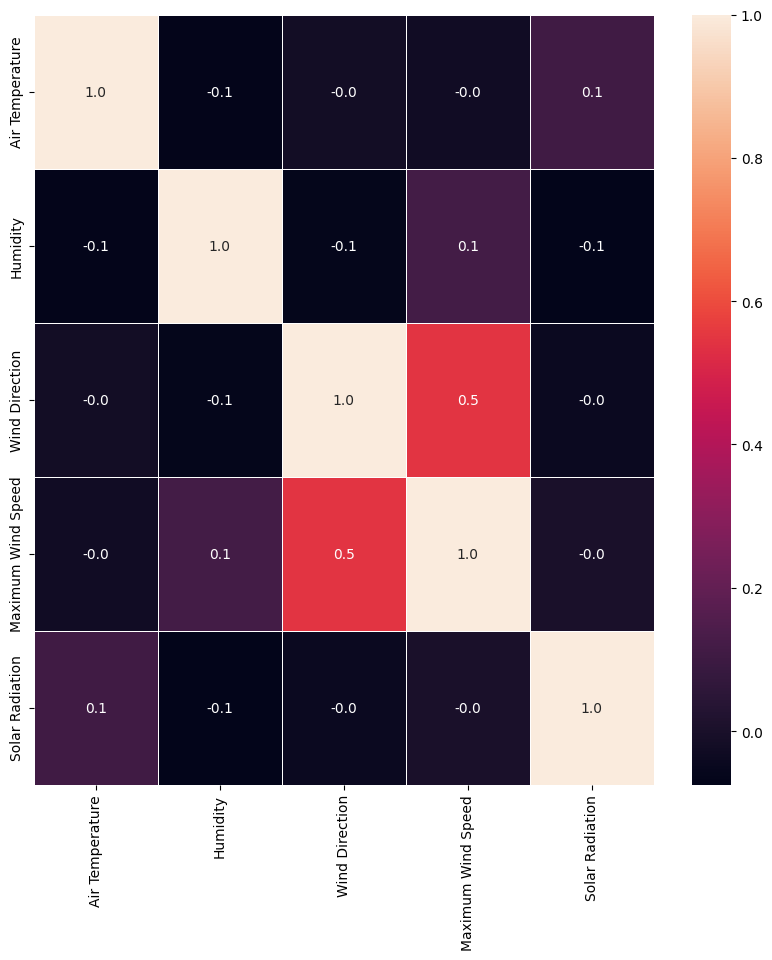

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);